In [1]:
#https://drive.google.com/file/d/1eJQ0VF9ZIV4_yoJMIf_7bi6C02TUWH7P/view?usp=drive_link offensive
#https://drive.google.com/file/d/1fcp0VldBVKHImFAJsYA_D0VbG6wiaBdF/view?usp=sharing draft
#https://drive.google.com/file/d/1uBVlDWgunlFSPPVqGJdW9MewexZH7uXg/view?usp=sharing playoff
#https://drive.google.com/file/d/1eG-gmFzEGk0bqDV9pRo1JGp4oOy8rocp/view?usp=sharing summary stats

#nfl offensive stats 2019-2022

In [2]:
library(tidyverse)
library(data.table)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [3]:
system("gdown --id 1eJQ0VF9ZIV4_yoJMIf_7bi6C02TUWH7P")

In [4]:
system("gdown --id 1fcp0VldBVKHImFAJsYA_D0VbG6wiaBdF")

In [5]:
system("gdown --id 1uBVlDWgunlFSPPVqGJdW9MewexZH7uXg")

In [6]:
system("gdown --id 1eG-gmFzEGk0bqDV9pRo1JGp4oOy8rocp")

In [7]:
system("ls",TRUE)

[1] "nfl_draft.csv"           "nfl_offensive_stats.csv"
[3] "nfl_playoff.csv"         "sample_data"            
[5] "summary_stats.csv"

In [8]:
draft <- fread("/content/nfl_draft.csv") %>% as_tibble()

In [9]:
stats <- fread("/content/nfl_offensive_stats.csv") %>% as_tibble()

In [10]:
playoff <- fread("/content/nfl_playoff.csv") %>% as_tibble()

In [11]:
summary_stats <- fread("/content/summary_stats.csv") %>% as_tibble()

In [13]:
draft %>% show()
stats %>% show()
playoff %>% show()
pro_stats %>% show()

# A tibble: 1,032 × 30
   V1    V2    V3    V4    V5    V6    V7    V8    V9    V10   V11   V12   V13  
   <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr>
 1 ""    ""    ""    ""    ""    ""    ""    Misc  Misc  ""    Appr… Appr… ""   
 2 "Rnd" "Pic… "Tm"  "Pla… "Pos" "Age" "Yea… AP1   PB    "St"  wAV   DrAV  "G"  
 3 "1"   "1"   "ARI" "Kyl… "QB"  "22"  "201… 0     2     "4"   51    51    "60" 
 4 "1"   "2"   "SFO" "Nic… "DE"  "21"  "201… 1     3     "3"   41    41    "62" 
 5 "1"   "3"   "NYJ" "Qui… "DT"  "21"  "201… 1     1     "4"   32    32    "68" 
 6 "1"   "4"   "OAK" "Cle… "DE"  "22"  "201… 0     0     "2"   12    12    "69" 
 7 "1"   "5"   "TAM" "Dev… "LB"  "21"  "201… 0     1     "4"   40    40    "73" 
 8 "1"   "6"   "NYG" "Dan… "QB"  "22"  "201… 0     0     "4"   38    38    "60" 
 9 "1"   "7"   "JAX" "Jos… "LB"  "22"  "201… 0     1     "3"   23    23    "68" 
10 "1"   "8"   "DET" "T.J… "TE"  "22"  "201… 0     2     "2"   21    17    "69" 
# ℹ 1

ERROR: ignored

offensive stats으로 랭킹과의 상관관계가 어떻게 되는지 회귀

* 오클랜드 레이더스가 라스베가스로 팀명 변경. 이상값 확인 필수

* draft데이터는 1970부터 2018 ~ 2021로 값 자르기. -> 2019~2022의 offensive 데이터 확인

드래프트의 결과로 공격수를 높은 순위로 뽑은 경우 다음 시즌 공격 스탯과 성적간의 상관관계를 설정

플레이오프 진출을 기준으로 성공적인 드래프트인지 분류.

2019년 NFL 시즌:
팀 랭킹:

슈퍼볼 우승: 칸자스시티 치프스
AFC 챔피언: 칸자스시티 치프스
NFC 챔피언: 샌프란시스코 49ers

2020년 NFL 시즌:
팀 랭킹:

슈퍼볼 우승: 탬파베이 버커니어스
AFC 챔피언: 칸자스시티 치프스
NFC 챔피언: 템파베이 버커니어스

2021년 NFL 시즌:
팀 랭킹:

슈퍼볼 우승: la 램스
AFC 챔피언: 시내티 벵갈스
NFC 챔피언: 로스앤젤레스 램스

2022년 NFL 시즌:
팀 랭킹:

슈퍼볼 우승 : 켄자스시티 치프스
AFC 챔피언 : 켄자스시티 치프스
NFC 챔피언 : 필라델피아 이글스

추가 사항 : 드래프트와 순위간의 상관관계.
분류모델은 어떻게 작성할 것인지?

In [ ]:
stats[1,]

In [ ]:
stats

In [ ]:
outlier_del <- stats %>%
  filter(pass_att != 0)

outlier_del

In [ ]:
#stats <- select(stats,position,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_rating,rush_att,rush_yds,rush_td,targets,rec,rec_yds,rec_td,fumbles_lost,game_date)

In [ ]:
#filtered_stats <- stats %>% filter(position == "QB")

In [ ]:
playoff <- na.omit(playoff)

In [ ]:
library(lubridate)

In [ ]:
playoff

In [ ]:

#game_date 컬럼을 날짜 형식으로 변환하여 새로운 컬럼인 game_date_parsed 생성
outlier_del$game_date_parsed <- mdy(outlier_del$game_date)  # 형식을 맞춰서 날짜 형식으로 변환

#game_year 컬럼을 생성하여 연도만 추출하여 할당
outlier_del$year <- year(outlier_del$game_date_parsed)  # 연도만 추출하여 새로운 컬럼인 year 생성




In [ ]:
head(outlier_del)  # 데이터의 처음 부분 출력하여 확인
tail(outlier_del)

In [ ]:
# pro_stats <- outlier_del %>%
#   group_by(player, game_year, team) %>%
#   summarise(
#     total_pass_cmp = sum(pass_cmp),
#     total_pass_att = sum(pass_att),
#     total_pass_yds = sum(pass_yds),
#     total_pass_td = sum(pass_td),
#     total_pass_int = sum(pass_int),
#     total_pass_rating = sum(pass_rating),
#     total_rush_att = sum(rush_att),
#     total_rush_yds = sum(rush_yds),
#     total_rush_td = sum(rush_td),
#     total_targets = sum(targets),
#     total_rec = sum(rec),
#     total_rec_yds = sum(rec_yds),
#     total_rec_td = sum(rec_td),
#     total_fumbles_lost = sum(fumbles_lost),
#     .groups = "drop"
#   ) %>%
#   filter(game_year %in% c(2019, 2020, 2021, 2022))

# # 결과 출력
# print(pro_stats)


In [ ]:
# 'pro_stats'라는 데이터프레임을 사용한다고 가정하겠습니다.
# 여기서 'player', 'game_year', 'team' 등의 문자열 열을 제외하고 숫자형 열만 선택할 예정입니다.

# 문자열 열을 제외한 숫자형 열 이름 리스트 생성
numeric_columns <- c('total_pass_cmp', 'total_pass_att', 'total_pass_yds', 'total_pass_td', 'total_pass_int',
                     'total_pass_rating', 'total_rush_att', 'total_rush_yds', 'total_rush_td',
                     'total_targets', 'total_rec', 'total_rec_yds', 'total_rec_td', 'total_fumbles_lost')

# 숫자형 열만을 선택하여 새로운 데이터프레임 생성
numeric_data <- pro_stats[, numeric_columns]

# 선택된 숫자형 열만으로 이루어진 데이터프레임 확인
head(numeric_data)


In [ ]:
cor(numeric_data)


In [ ]:
install.packages("GGally")
install.packages("PerformanceAnalytics")
install.packages("corrr")

In [ ]:
library(corrr)
library(GGally)
library(PerformanceAnalytics)

In [ ]:
playoff$succ[is.na(playoff$succ)] <- FALSE

playoff$'playoff-seed'[is.na(playoff$'playoff-seed')] <- FALSE


In [ ]:
playoff

In [ ]:
names(summary_stats)[2] <- c("year")

In [ ]:
summary_stats

In [ ]:
unique_teams <- unique(playoff$team)
print(unique_teams)

In [ ]:
unique_teams <- unique(summary_stats$team)
print(unique_teams)

In [ ]:
advance_data <- merge(summary_stats, playoff, by = c("team", "year")) #team과 year를 기준으로 playoff와 pro_stats를 병합

In [ ]:
unique_teams <- unique(advance_data$team)
print(unique_teams)


In [ ]:
merged_data #playoff에 진출한 시즌의 쿼터백들과 공격스탯

In [ ]:
library(dplyr)

# 모든 스탯을 합한 total_off 열 추가
summary_stats <- summary_stats %>%
  mutate(total_off = total_pass_cmp + total_pass_att + total_pass_yds + total_pass_td + total_pass_int + total_pass_rating + total_rush_att + total_rush_yds + total_rush_td + total_targets + total_rec + total_rec_yds + total_rec_td + total_fumbles_lost)

# 각 연도별, 각 팀에서 total_off가 가장 큰 선수 출력
starting_2019 <- summary_stats %>%
  filter(year == 2019) %>%
  group_by(year, team) %>%
  filter(row_number(desc(total_off)) == 1) %>%
  ungroup()

# 결과 출력
starting_2019



In [ ]:
summary_stats <- summary_stats %>%
  mutate(total_off = total_pass_cmp + total_pass_att + total_pass_yds + total_pass_td + total_pass_int + total_pass_rating + total_rush_att + total_rush_yds + total_rush_td + total_targets + total_rec + total_rec_yds + total_rec_td + total_fumbles_lost)

# 각 연도별, 각 팀에서 total_off가 가장 큰 선수 출력
starting_2020 <- summary_stats %>%
  filter(year == 2020) %>%
  group_by(year, team) %>%
  filter(row_number(desc(total_off)) == 1) %>%
  ungroup()

# 결과 출력
starting_2020


In [ ]:
summary_stats <- summary_stats %>%
  mutate(total_off = total_pass_cmp + total_pass_att + total_pass_yds + total_pass_td + total_pass_int + total_pass_rating + total_rush_att + total_rush_yds + total_rush_td + total_targets + total_rec + total_rec_yds + total_rec_td + total_fumbles_lost)

# 각 연도별, 각 팀에서 total_off가 가장 큰 선수 출력
starting_2021 <- summary_stats %>%
  filter(year == 2021) %>%
  group_by(year, team) %>%
  filter(row_number(desc(total_off)) == 1) %>%
  ungroup()

# 결과 출력
starting_2021

In [ ]:
summary_stats <- summary_stats %>%
  mutate(total_off = total_pass_cmp + total_pass_att + total_pass_yds + total_pass_td + total_pass_int + total_pass_rating + total_rush_att + total_rush_yds + total_rush_td + total_targets + total_rec + total_rec_yds + total_rec_td + total_fumbles_lost)

# 각 연도별, 각 팀에서 total_off가 가장 큰 선수 출력
starting_2022 <- summary_stats %>%
  filter(year == 2022) %>%
  group_by(year, team) %>%
  filter(row_number(desc(total_off)) == 1) %>%
  ungroup()

# 결과 출력
starting_2022

In [ ]:
play_2019 <- merge(playoff, starting_2019, by = c("year", "team"))

# 결과 출력
play_2019

In [ ]:
play_2020 <- merge(playoff, starting_2020, by = c("year", "team"))

# 결과 출력
play_2020

In [ ]:
play_2021 <- merge(playoff, starting_2021, by = c("year", "team"))

# 결과 출력
play_2021

In [ ]:
play_2022 <- merge(playoff, starting_2022, by = c("year", "team"))

# 결과 출력
play_2022

In [ ]:

final_stats <- bind_rows(play_2019, play_2020, play_2021, play_2022)
final_stats

In [ ]:
write.csv(final_stats, file = "final_stats.csv", row.names = FALSE)

In [ ]:
# Assuming your data frame is named final_stats
# I'm considering playoff-seed as a factor for prediction

# Convert playoff-seed to a factor (if it's not already)
final_stats$playoff_seed_factor <- as.factor(final_stats$'playoff-seed')

# Fit logistic regression model
logistic_model <- glm(playoff_seed_factor ~ total_pass_cmp + total_pass_att + total_pass_yds + total_pass_td +
                      total_pass_rating + total_rush_att + total_rush_yds + total_rush_td +
                      total_targets + total_rec + total_rec_yds + total_rec_td +
                      total_fumbles_lost + total_off, data = final_stats, family = "binomial")

# Summary of the model
summary(logistic_model)


이 모델은 각각의 스탯이 플레이오프 진출 여부에 미치는 영향을 설명합니다. 여기서 몇 가지 특징을 살펴볼 수 있습니다:

total_pass_cmp (패스 완료), total_pass_att (패스 시도), total_pass_yds (패스 야드), total_pass_td (패스 타우치다운), total_pass_rating (패스 레이팅), total_rush_att (러시 시도), total_rush_yds (러시 야드), total_rush_td (러시 타우치다운): 이러한 스탯들은 플레이오프 진출 여부에 통계적으로 유의미한 영향을 미칩니다. 특히 패스 타우치다운, 러시 시도 및 러시 야드는 유의미한 영향이 있는 것으로 나타납니다.

total_targets (패스 타겟), total_rec (패스 캐치), total_rec_yds (패스 캐치 야드), total_rec_td (패스 캐치 타우치다운), total_fumbles_lost (폼블): 이러한 스탯들은 플레이오프 진출 여부와 통계적으로 크게 연관되지 않는 것으로 나타났습니다.

이 모델은 플레이오프 진출 여부를 예측하기 위해 사용된 것이므로, 이러한 스탯들이 실제로 플레이오프 진출과 어떻게 관련되는지 이해할 수 있습니다. 그러나 모델의 결과가 단순히 통계적으로 유의미한 변수를 나열한 것이라는 점을 염두에 두는 것이 중요합니다.

In [ ]:
# 데이터셋에서 필요한 열만 추출하여 새로운 데이터프레임 생성
data_subset <- final_stats[c("succ", "total_off")]

# succ 열 이름을 변경하여 플레이오프 진출 여부를 나타내는 열로 변환
names(data_subset)[1] <- "playoff_entry"

# 로지스틱 회귀 모델 적합
logistic_model <- glm(playoff_entry ~ total_off, family = binomial, data = data_subset)

# 모델 요약 확인
summary(logistic_model)


In [ ]:
library(dplyr)

# 필요한 컬럼만 선택하여 새로운 데이터프레임 생성
quarterback_stats <- final_stats %>%
  select(succ, total_pass_cmp, total_pass_att, total_pass_yds,
         total_pass_td, total_pass_rating, total_rush_att, total_rush_yds, total_rush_td, total_targets, total_rec, total_rec_yds, total_rec_td, total_fumbles_lost)

# 로지스틱 회귀 모델 적합화
logistic_model <- glm(succ ~ total_pass_cmp + total_pass_att + total_pass_yds +
                        total_pass_td + total_pass_rating + total_rush_att +
                        total_rush_yds + total_rush_td + total_targets + total_rec + total_rec_yds + total_rec_td + total_fumbles_lost, data = quarterback_stats, family = "binomial")

# 모델 요약
summary(logistic_model)



이 로지스틱 회귀 분석 결과는 선택한 쿼터백 스탯과 플레이오프 진출 여부 간의 관계를 설명합니다.

Intercept (절편): -1.9488248. 이 값은 모든 독립 변수가 0일 때 (다른 모든 스탯이 0일 때), 플레이오프에 진출할 확률의 로그 오즈를 나타냅니다.

total_pass_cmp (패스 완료): p-value가 0.144771로 유의수준 0.05보다 높아서 이 변수는 플레이오프 진출 여부를 예측하는 데 중요하지 않을 수 있습니다.

total_pass_yds (패스 야드): p-value가 0.001165로 유의수준보다 훨씬 낮아서 이 변수는 플레이오프 진출 여부를 예측하는 데 중요할 가능성이 높습니다. 예를 들어, 패스 야드가 높을수록 플레이오프 진출할 확률이 낮아질 수 있습니다.

total_pass_td (패스 타우치다운): 매우 낮은 p-value로 플레이오프 진출에 유의미한 영향을 미칠 것으로 보입니다.

total_rush_att (러시 시도), total_rush_yds (러시 야드): 러시 시도와 러시 야드는 플레이오프 진출에 유의미한 영향을 미칠 것으로 보입니다.

이것들은 각 스탯이 플레이오프 진출 여부에 어떻게 영향을 미치는지를 나타내는 것입니다. 하지만, 주의해야 할 점은 통계적으로 유의미한 변수라고 해도 실제로 그 영향이 얼마나 큰지를 정확하게 판단하기 위해서는 해당 도메인 지식과 추가적인 분석이 필요할 수 있습니다.

이 모델은 final_stats 데이터셋에서 로지스틱 회귀 분석을 수행한 결과를 나타냅니다. 각 변수의 회귀 계수와 해당 계수의 유의성을 나타내는 p-value가 제시되어 있습니다.

여기서, p-value는 해당 변수가 종속 변수에 미치는 영향의 통계적 유의성을 나타내며, 관례적으로 0.05보다 작은 경우, 해당 변수는 종속 변수에 통계적으로 유의미한 영향을 미친다고 해석됩니다.

여기서 유의미한(p-value < 0.05) 변수는 total_pass_td, total_rush_att, total_rush_yds입니다. 이 변수들은 succ_binary라는 종속 변수에 유의미한 영향을 미치는 것으로 나타났습니다. 반면에, 다른 변수들은 해당 데이터셋에서는 유의미하지 않은 것으로 보입니다.

또한, 모델의 적합도를 나타내는 지표들이 있습니다. Null deviance와 Residual deviance는 모델의 적합도를 나타내는 지표입니다. Residual deviance가 Null deviance보다 작을수록 모델의 적합도가 높다고 해석할 수 있습니다.

해당 결과를 바탕으로 분석을 진행하거나 추가적인 모델 평가를 위해 ROC 곡선, 혼동 행렬 등의 지표를 확인할 수 있습니다. 이러한 평가를 통해 모델의 성능을 더 정확하게 평가할 수 있습니다.






In [ ]:
# 'final_stats' 데이터 프레임의 변수들 간 상관 관계 확인하기
correlation_matrix <- cor(final_stats[, c("succ","total_pass_cmp", "total_pass_att", "total_pass_yds", "total_pass_td", "total_pass_rating", "total_rush_att", "total_rush_yds", "total_rush_td", "total_targets", "total_rec", "total_rec_yds", "total_rec_td", "total_fumbles_lost")])

# 상관 관계 행렬 출력
print(correlation_matrix)


상관 행렬은 데이터 세트에서 각 변수 간의 선형 관계를 보여줍니다. 값의 범위는 -1에서 1까지이며 다음과 같은 해석을 가집니다:

1 또는 -1: 완벽한 양의 또는 음의 선형 상관 관계
0: 선형 관계가 없음
이 행렬에서 각 셀은 해당 두 변수 간의 상관 관계를 나타냅니다. 예를 들어, total_pass_cmp와 total_pass_att 사이의 상관 관계는 0.98로 매우 높습니다. 이는 두 변수 간에 강한 양의 선형 관계가 있음을 시사합니다. 이들이 서로 더 유사한 패턴을 보인다는 것을 의미합니다.

행렬의 대각선 요소는 각 변수 자신에 대한 상관 관계이므로 항상 1입니다. 이 값들은 동일한 변수이기 때문에 완전히 일치합니다.

여기서 몇 가지 예시를 살펴보겠습니다:

total_pass_yds와 total_off 사이의 상관 관계는 0.975로 매우 높습니다. 즉, 패스 야드와 총 공격력 사이에 강한 양의 선형 관계가 있음을 나타냅니다.
total_rush_td와 total_rush_att 간의 상관 관계는 0.786으로 상당히 높습니다. 이는 서로 강한 양의 관계를 나타내며, 러싱 시도와 러싱 타우치다운 사이에 양의 선형 관계가 있음을 나타냅니다.
이러한 관계들은 데이터의 패턴을 이해하는 데 도움이 됩니다. 하지만 상관 관계가 높다고 해서 인과 관계를 의미하지는 않으며, 추가적인 분석이 필요합니다.

In [ ]:
PerformanceAnalytics::chart.Correlation(correlation_matrix,histogram=TRUE,pch=19,width=15,height=15)

In [ ]:
install.packages('ggraph')

In [ ]:
library(corrr)

correlation_matrix %>%
  correlate() %>%
  network_plot(min_cor = 0, colours = c("indianred2","black","skyblue1"))

In [ ]:

# x 축 레이블 회전하여 겹치지 않도록 설정
boxplot(correlation_matrix, las = 2)


In [ ]:
mean(final_stats$total_rush_td)


In [ ]:
table(is.na(final_stats))

In [ ]:
# 2019부터 2021년까지의 데이터는 훈련 데이터로 사용
train_set <- subset(final_stats, year %in% c(2019, 2020, 2021))

# 2022년 데이터는 테스트 데이터로 사용
test_set <- subset(final_stats, year == 2022)


In [ ]:
train_set

In [ ]:
test_set

In [ ]:
install.packages("pROC")
library(pROC)

In [ ]:
install.packages("gmodels")

In [ ]:
library(pROC)

# final_stats를 사용하여 ROC 곡선 그리기
roc_data <- roc(final_stats$succ, final_stats$total_rush_td)
plot(roc_data, col = "blue", main = "ROC Curve for total_rush_td")

In [ ]:
m <- glm(succ ~ ., data = train_set, family="binomial")
summary(m)

In [ ]:
# 로지스틱 회귀 모델 적합화
m <- glm(succ ~ total_pass_cmp + total_pass_att + total_pass_yds +
                        total_pass_td + total_pass_rating + total_rush_att +
                        total_rush_yds + total_rush_td + total_targets + total_rec +
                        total_rec_yds + total_rec_td + total_fumbles_lost, data = train_set, family = "binomial")

# 모델 요약
summary(m)

In [ ]:
mback <- step(m,direction='backward')

In [ ]:
summary(mback)

In [ ]:
predict_value <- predict(mback,test_set,type="response") %>% tibble(predict_value = .)
predict_value %>% show()

In [ ]:
predict_check <- test_set %>% select(succ) %>% dplyr::bind_cols(.,predict_value)
predict_check %>% show()

In [ ]:
predict_cutoff_5 <- predict_check %>%
  mutate(predict_succ= as.factor(ifelse(predict_value > 0.074, 1, 0)))
predict_cutoff_5 %>% show()

In [ ]:
roc_c <- pROC::roc(predict_check$succ,predict_check$predict_value)
pROC::plot.roc(roc_c,
              col="royalblue",
              print.auc=TRUE,
              max.auc.polygon=TRUE,
              print.thres=TRUE, print.thres.pch=19, print.thres.col="red",
              auc.polygon=TRUE,auc.polygon.col="#D1F2EB")

In [ ]:
roc_c <- pROC::roc(predict_check$succ,predict_check$predict_value)
pROC::plot.roc(roc_c,
              col="royalblue",
              print.auc=TRUE,
              max.auc.polygon=TRUE,
              print.thres=TRUE, print.thres.pch=19, print.thres.col="red",
              auc.polygon=TRUE,auc.polygon.col="#D1F2EB")

In [ ]:
pROC::coords(roc_c,"best",ret="threshold",transpose=F)

In [ ]:
predict_cutoff_5 <- predict_check %>%
  mutate(predict_succ= as.factor(ifelse(predict_value > 0.05216315, 1, 0)))
predict_cutoff_5 %>% show()

In [ ]:
predict_value_mback <- predict(m, test_set, type = "response") %>%
 tibble(predict_value = .)
predict_check_mback <- test_set %>%
 select(succ) %>%
 dplyr::bind_cols(., predict_value_mback)


roc_c_mback <- pROC::roc(predict_check_mback$succ, predict_check_mback$predict_value)


pROC::plot.roc(roc_c, col = "red", print.auc=T, max.auc.polygon=T, print.thres=T, print.thres.pch=19, print.thres.col = "red", auc.polygon=T, auc.polygon.col="#D1F2EB")
pROC::plot.roc(roc_c_mback, add=T, # 기본 그래프에 추가할 수 있도록 설정
 col="blue", print.auc=T, print.auc.adj=c(1.11,1.2), print.thres=T, print.thres.pch=19, print.thres.col = "blue")
legend("bottomright", legend=c("m", "mback"), col=c("red", "blue"), lwd = 2)

In [ ]:
library(dplyr)

# 선수별, 연도별 데이터 그룹화
grouped_data <- stats %>%
  mutate(year = as.integer(substring(game_date, nchar(game_date) - 3, nchar(game_date)))) %>%
  group_by(year, player) %>%
  summarise_all(list)



In [ ]:
result_summary <- filtered_stats %>%
  group_by(player_id, game_id, position, team) %>%
  summarise(
    total_pass_cmp = sum(pass_cmp),
    total_pass_att = sum(pass_att),
    total_pass_yds = sum(pass_yds),
    total_pass_td = sum(pass_td),
    total_pass_int = sum(pass_int),
    total_pass_rating = sum(pass_rating),
    total_rush_att = sum(rush_att),
    total_rush_yds = sum(rush_yds),
    total_rush_td = sum(rush_td),
    total_targets = sum(targets),
    total_rec = sum(rec),
    total_rec_yds = sum(rec_yds),
    total_rec_td = sum(rec_td),
    total_fumbles_lost = sum(fumbles_lost)
  ) %>%
  distinct(player_id, game_id, position, team, .keep_all = TRUE)

# 결과 출력
print(result_summary)


In [ ]:
library(dplyr)

# game_id의 왼쪽 4글자로 year 칼럼 생성
data_processed <- stats %>%
  mutate(year = as.integer(substr(game_id, 1, 4))) %>%
  # 선수별, 연도별 데이터 그룹화하여 스탯 더하기
  group_by(year, player_id, position, player, team) %>%
  summarise(
    across(where(is.numeric), sum, na.rm = TRUE),
    .groups = "drop"
  )


In [ ]:
install.packages('caret')

In [37]:
draft %>% str()
draft %>% show()

tibble [1,032 × 30] (S3: tbl_df/tbl/data.frame)
 $ V1 : chr [1:1032] "" "Rnd" "1" "1" ...
 $ V2 : chr [1:1032] "" "Pick" "1" "2" ...
 $ V3 : chr [1:1032] "" "Tm" "ARI" "SFO" ...
 $ V4 : chr [1:1032] "" "Player" "Kyler Murray" "Nick Bosa" ...
 $ V5 : chr [1:1032] "" "Pos" "QB" "DE" ...
 $ V6 : chr [1:1032] "" "Age" "22" "21" ...
 $ V7 : chr [1:1032] "" "Year" "2019" "2019" ...
 $ V8 : chr [1:1032] "Misc" "AP1" "0" "1" ...
 $ V9 : chr [1:1032] "Misc" "PB" "2" "3" ...
 $ V10: chr [1:1032] "" "St" "4" "3" ...
 $ V11: chr [1:1032] "Approx Val" "wAV" "51" "41" ...
 $ V12: chr [1:1032] "Approx Val" "DrAV" "51" "41" ...
 $ V13: chr [1:1032] "" "G" "60" "62" ...
 $ V14: chr [1:1032] "Passing" "Cmp" "1382" "0" ...
 $ V15: chr [1:1032] "Passing" "Att" "2078" "0" ...
 $ V16: chr [1:1032] "Passing" "Yds" "14567" "0" ...
 $ V17: chr [1:1032] "Passing" "TD" "86" "0" ...
 $ V18: chr [1:1032] "Passing" "Int" "43" "0" ...
 $ V19: chr [1:1032] "Rushing" "Att" "395" "0" ...
 $ V20: chr [1:1032] "Rushing" 

In [ ]:
# 예측 결과와 실제 결과를 factor로 변환
predict_cutoff_5$succ <- factor(predict_cutoff_5$succ)
predict_cutoff_5$predict_succ <- factor(predict_cutoff_5$predict_succ)

# factor 수준을 일치시키기 위해 levels 맞추기
levels(predict_cutoff_5$succ) <- levels(predict_cutoff_5$predict_succ)

# 다시 confusionMatrix 생성
confusion_matrix <- caret::confusionMatrix(predict_cutoff_5$succ, predict_cutoff_5$predict_succ)


In [ ]:
confusion_matrix

In [ ]:
install.packages('rpart')
install.packages('rpart.plot')

In [14]:
draft_2 <- draft

In [19]:
draft_2[, 6:12] <- lapply(draft_2[,6:12], as.integer)


In [16]:
# 데이터 프레임의 열 이름을 첫 번째 행 값으로 설정하기
colnames(draft_2) <- as.character(unlist(draft_2[1, ]))
draft_2 <- draft_2[-1, ]  # 첫 번째 행 제거

# 열 이름이 변경된 데이터 확인
names(draft_2)


[1] "Rnd"          "Pick"         "Tm"           "Player"       "Pos"         
 [6] "Age"          "Year"         "AP1"          "PB"           "St"          
[11] "wAV"          "DrAV"         "G"            "Cmp"          "Att"         
[16] "Yds"          "TD"           "Int"          "Att"          "Yds"         
[21] "TD"           "Rec"          "Yds"          "TD"           "Solo"        
[26] "Int"          "Sk"           "College/Univ" ""             "-9999"

In [18]:
colnames(draft_2)

[1] "Rnd"    "Pick"   "Tm"     "Player" "Pos"    "Age"    "Year"   "AP1"   
 [9] "PB"     "St"     "wAV"    "DrAV"

In [38]:
draft_2

Rnd,Pick,Tm,Player,Pos,Age,Year,AP1,PB,St,wAV,DrAV
<fct>,<fct>,<chr>,<chr>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>
1,1,ARI,Kyler Murray,QB,22,2019,0,2,4,51,51
1,2,SFO,Nick Bosa,DE,21,2019,1,3,3,41,41
1,3,NYJ,Quinnen Williams,DT,21,2019,1,1,4,32,32
1,4,OAK,Clelin Ferrell,DE,22,2019,0,0,2,12,12
1,5,TAM,Devin White,LB,21,2019,0,1,4,40,40
1,6,NYG,Daniel Jones,QB,22,2019,0,0,4,38,38
1,7,JAX,Josh Allen,LB,22,2019,0,1,3,23,23
1,8,DET,T.J. Hockenson,TE,22,2019,0,2,2,21,17
1,9,BUF,Ed Oliver,DT,21,2019,0,0,3,29,29


In [ ]:
draft

In [17]:
# 데이터프레임의 열 이름 출력

# draft_2 <- draft_2[-1,]
draft_2 <- draft_2[,1:12]

In [39]:
draft_2 %>% str()
draft_2 %>% show()

tibble [1,030 × 12] (S3: tbl_df/tbl/data.frame)
 $ Rnd   : Factor w/ 7 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Pick  : Factor w/ 262 levels "1","10","100",..: 1 112 186 197 208 219 230 241 252 2 ...
 $ Tm    : chr [1:1030] "ARI" "SFO" "NYJ" "OAK" ...
 $ Player: chr [1:1030] "Kyler Murray" "Nick Bosa" "Quinnen Williams" "Clelin Ferrell" ...
 $ Pos   : Factor w/ 21 levels "C","CB","DB",..: 16 4 6 4 10 16 10 20 6 10 ...
 $ Age   : int [1:1030] 22 21 21 22 21 22 22 22 21 21 ...
 $ Year  : int [1:1030] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...
 $ AP1   : Factor w/ 3 levels "0","1","2": 1 2 2 1 1 1 1 1 1 1 ...
 $ PB    : Factor w/ 4 levels "0","1","2","3": 3 4 2 1 2 1 2 3 1 1 ...
 $ St    : Factor w/ 5 levels "0","1","2","3",..: 5 4 5 3 5 5 4 3 4 3 ...
 $ wAV   : int [1:1030] 51 41 32 12 40 38 23 21 29 23 ...
 $ DrAV  : int [1:1030] 51 41 32 12 40 38 23 17 29 23 ...
 - attr(*, ".internal.selfref")=<externalptr> 
# A tibble: 1,030 × 12
   Rnd   Pick  Tm    Player    

In [20]:
draft_2[is.na(draft_2)] <- 0

In [21]:
# draft_2 데이터프레임의 특정 열을 factor로 변환하기
draft_2 <- draft_2 %>%
  mutate(across(c(Rnd, Pick, Pos, AP1, PB, St), as.factor))


In [22]:
library(e1071)

# SVM 모델 학습
svm_model <- svm(factor(Rnd) ~ wAV + DrAV, data = draft_2)

# 학습된 모델 요약
summary(svm_model)



Call:
svm(formula = factor(Rnd) ~ wAV + DrAV, data = draft_2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  1010

 ( 117 128 162 153 144 162 144 )


Number of Classes:  7 

Levels: 
 1 2 3 4 5 6 7




In [ ]:
install.packages("randomForest")

In [40]:
# randomForest 라이브러리 불러오기
library(randomForest)

# 데이터 준비
# draft 데이터셋에서 필요한 열만 추출
draft_2 <- draft_2[, c("Rnd", "wAV", "DrAV")]

# NA 값을 0으로 대체
draft_2[is.na(draft_2)] <- 0

# 랜덤 포레스트 모델 학습
model <- randomForest(factor(Rnd) ~ wAV + DrAV, data = draft_2, ntree = 500)

# 모델 요약 정보 출력
summary(model)

# 모델 평가를 위해 시각화나 다른 방법을 활용할 수 있습니다.


                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted       1030   factor numeric  
err.rate        4000   -none- numeric  
confusion         56   -none- numeric  
votes           7210   matrix numeric  
oob.times       1030   -none- numeric  
classes            7   -none- character
importance         2   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y               1030   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [41]:
print(model)


Call:
 randomForest(formula = factor(Rnd) ~ wAV + DrAV, data = draft_2,      ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 77.18%
Confusion matrix:
   1  2  3  4 5 6   7 class.error
1 57 23 26 11 1 3   7   0.5546875
2 45  0 49 17 4 5   8   1.0000000
3 27 13 50 28 2 8  34   0.6913580
4 13 11 59 14 2 5  49   0.9084967
5 13  2 41 17 5 4  62   0.9652778
6 12  7 44  9 1 7  82   0.9567901
7  3  0 27 10 4 7 102   0.3333333


In [23]:
# 2019부터 2021년까지 데이터로 훈련 세트 생성
train_set <- subset(draft_2, Year >= 2019 & Year <= 2021)

# 2022년 데이터로 테스트 세트 생성
test_set <- subset(draft_2, Year == 2022)

# 훈련 세트와 테스트 세트의 구조 확인
dim(train_set)  # 훈련 세트의 행과 열 수 확인
dim(test_set)   # 테스트 세트의 행과 열 수 확인


[1] 768  12

[1] 262  12

In [24]:
library(e1071)

# train_set을 이용하여 SVM 모델 학습
svm_model <- svm(factor(Rnd) ~ wAV + DrAV, data = train_set)

# 학습된 모델 요약
summary(svm_model)



Call:
svm(formula = factor(Rnd) ~ wAV + DrAV, data = train_set)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  747

 ( 86 96 121 115 108 120 101 )


Number of Classes:  7 

Levels: 
 1 2 3 4 5 6 7




In [27]:
# train_set으로 학습된 모델을 이용하여 test_set 예측
svm_predictions <- predict(svm_model, newdata = test_set)

# 예측 결과 확인
print(svm_predictions)


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  3   3   6   3   3   3   3   3   3   3   3   7   6   7   4   4   3   4   7   3 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  6   3   6   3   3   7   3   7   3   3   7   7   7   3   3   4   3   7   4   7 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  3   7   7   7   7   7   7   4   6   7   7   3   4   7   7   7   6   6   3   4 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  7   7   4   7   3   7   7   7   3   7   7   3   7   6   3   7   4   6   7   6 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  7   7   7   7   3   7   7   7   7   3   4   7   7   7   4   7   4   6   7   7 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  7   7   4   7   7   6   3   7   7   7   7   6   7   6   4   7   7   7   7   7 
121 122 123 124 125 126 127 

In [32]:
library(randomForest)

# train_set으로 랜덤 포레스트 모델 학습
rf_model <- randomForest(factor(Rnd) ~ wAV + DrAV, data = train_set, ntree = 500)


                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted        768   factor numeric  
err.rate        4000   -none- numeric  
confusion         56   -none- numeric  
votes           5376   matrix numeric  
oob.times        768   -none- numeric  
classes            7   -none- character
importance         2   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                768   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

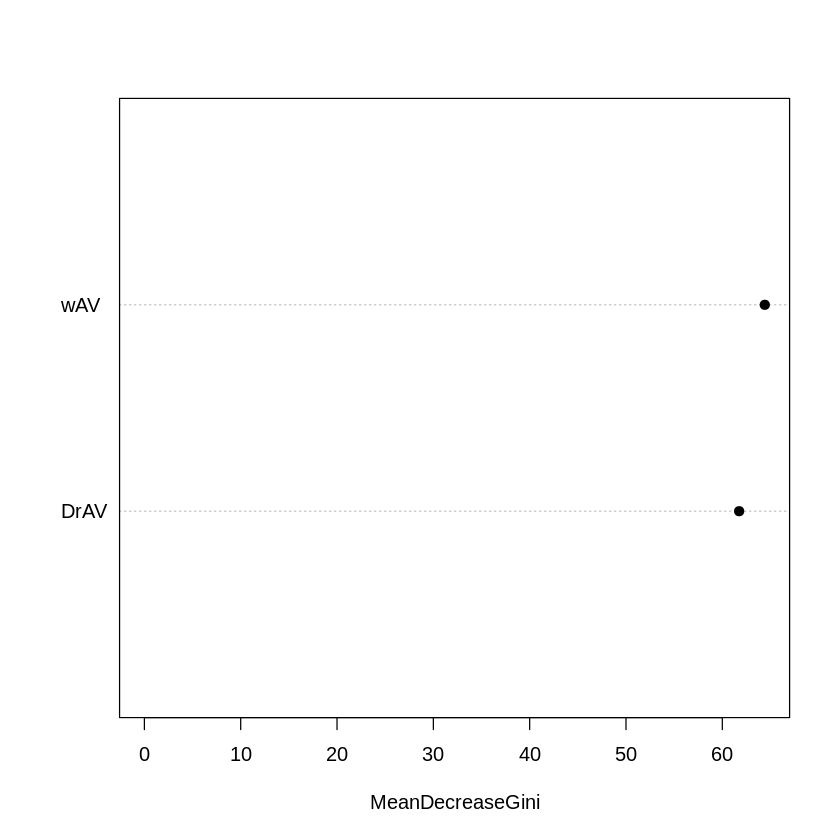

In [43]:
varImpPlot(rf_model,type=2,pch=19,col=1,cex=1,main="")

In [33]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [35]:
library(caret)

# 예측값과 실제값으로 혼동 행렬 생성
confusion_matrix <- confusionMatrix(svm_predictions, test_set$Rnd)

# 혼동 행렬 출력
print(confusion_matrix)


Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7
         1  0  0  0  0  0  0  0
         2  0  0  0  0  0  0  0
         3 18  6  6  3  3  2  2
         4  3  6  5  5  3  0  1
         5  0  0  0  0  0  0  0
         6  4  3  4  4  2  0  2
         7  7 17 26 26 28 40 36

Overall Statistics
                                          
               Accuracy : 0.1794          
                 95% CI : (0.1349, 0.2313)
    No Information Rate : 0.1603          
    P-Value [Acc > NIR] : 0.2219          
                                          
                  Kappa : 0.028           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            0.0000   0.0000   0.1463  0.13158   0.0000  0.00000
Specificity            1.0000   1.0000   0.8462  0.91964   1.0000  0.91364
Pos Pred Value            NaN      N

In [36]:
draft

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,,,,,,,Misc,Misc,,⋯,Rushing,Receiving,Receiving,Receiving,,,,,,#NAME?
Rnd,Pick,Tm,Player,Pos,Age,Year,AP1,PB,St,⋯,TD,Rec,Yds,TD,Solo,Int,Sk,College/Univ,,-9999
1,1,ARI,Kyler Murray,QB,22,2019,0,2,4,⋯,26,0,7,0,,,,Oklahoma,College Stats,MurrKy00
1,2,SFO,Nick Bosa,DE,21,2019,1,3,3,⋯,0,0,0,0,138,1,51,Ohio St.,College Stats,BosaNi00
1,3,NYJ,Quinnen Williams,DT,21,2019,1,1,4,⋯,0,0,0,0,144,1,29.5,Alabama,College Stats,WillQu00
1,4,OAK,Clelin Ferrell,DE,22,2019,0,0,2,⋯,0,0,0,0,68,,11.5,Clemson,College Stats,FerrCl00
1,5,TAM,Devin White,LB,21,2019,0,1,4,⋯,0,0,0,0,354,2,22.5,LSU,College Stats,WhitDe02
1,6,NYG,Daniel Jones,QB,22,2019,0,0,4,⋯,13,1,16,0,,,,Duke,College Stats,JoneDa05
1,7,JAX,Josh Allen,LB,22,2019,0,1,3,⋯,0,0,0,0,144,1,39.5,Kentucky,College Stats,AlleJo03


In [ ]:
index <- caret::createDataPartition(y=draft_2$Rnd,p=0.9,list=FALSE)
train <- draft_2[index, ]
test <- draft_2[-index, ]

train %>% show()
test %>% show()

In [ ]:
library(ipred)

In [ ]:
predict_value_bagging <- predict(model_bagging, test, type ='class') %>% tibble(predict_value_bagging=.)
head(predict_value_bagging)